![PPGI_UFRJ](https://github.com/zavaleta/Fundamentos_DS/blob/main/imagens/ppgi-ufrj.png?raw=1)
# Fundamentos de Ciência de Dados
## 2022 - BL2
### **Aluno:** Gilberto Gil, Saulo Andrade Almeida, Valquire

# Trabalho Final
---

In [1]:
#checking version machine architecture, OS, python and all libs used in this notebook
import platform as platform
import numpy as np
import pandas as pd
import os
import conda
import pydot
import prov

def checkingEnvironmentVersions(details=False):

    #definnig version of python and all libs used
    HOST_MACHINE_ARCHTECTURE_EXPECTED = 'x86_64'
    HOST_MACHINE_OS_EXPECTED = 'Linux'
    HOST_MACHINE_PLATFORM = 'Linux-5.15.0-47-generic-x86_64-with-glibc2.31'
    CONDA_VERSION_EXPECTED = '4.14.0'
    CONDA_DEFAULT_ENV_EXPECTED = 'drecvmenv'
    PYTHON_VERSION_EXPECTED = '3.9.12'
    NUMPY_LIB_VERSION_EXPECTED = '1.21.5'
    PANDAS_LIB_VERSION_EXPECTED = '1.4.2'
    PYDOT_LIB_VERSION_EXPECTED = '1.4.2'
    PROV_LIB_VERSION_EXPECTED = '2.0.0'
    

    if details: 
        print('Host Machine Architecture:', platform.machine())
        print('Host Machine OS:', platform.system())
        print('Conda Version:', conda.__version__)
        print('Conda default env:', os.environ['CONDA_DEFAULT_ENV'])
        print('Python Version:', platform.python_version())
        print('NumPy Lib Version:', np.__version__)
        print('Pandas Lib Version:', pd.__version__)
        print('PyDot Lib Version:', pydot.__version__)
        print('Prov Lib Version:', prov.__version__)
        
    #checking versions
    try:
        #checking Machine Architecute expected
        assert platform.machine() == HOST_MACHINE_ARCHTECTURE_EXPECTED

        #checking OS expected
        assert platform.system() == HOST_MACHINE_OS_EXPECTED
        
        #checking conda version
        assert conda.__version__ == CONDA_VERSION_EXPECTED
        
        #checking conda default environment
        assert os.environ['CONDA_DEFAULT_ENV'] == CONDA_DEFAULT_ENV_EXPECTED    

        #checking python version
        assert platform.python_version() == PYTHON_VERSION_EXPECTED

        #checking numpy lib version
        assert np.__version__ == NUMPY_LIB_VERSION_EXPECTED  

        #checking Pandas lib version
        assert pd.__version__ == PANDAS_LIB_VERSION_EXPECTED
        
        #checking pydot version
        assert pydot.__version__ == PYDOT_LIB_VERSION_EXPECTED
        
        #checking prov version
        assert prov.__version__ == PROV_LIB_VERSION_EXPECTED
    except:
        #if any assert fail, or something else get wrong during verification
        if details: print('Something is wrong!')
        return False
    else:
        #if pass all asserts
        if details: print('All versions are correct!')
        return True

In [2]:
#Utilizado ambiente python 3.9
import pandas as pd
import numpy as np
from datetime import datetime

dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

def loadCsv(path, file):
    return pd.read_csv(path+file, sep=';', header=0, encoding="ISO-8859-1")

def loadCompanyInfo():
    return loadCsv("data/cad-emp/", "cad_cia_aberta.csv")

def allHistoricalYears():
    return [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

def loadDreItr(years):
    tempDF = pd.DataFrame() 
    for year in years:
        tempDF = pd.concat([tempDF, loadCsv("data/dre-itr/","itr_cia_aberta_DRE_con_{0}.csv".format(year))], ignore_index=True)
    return tempDF

def loadDreDfp(years):
    tempDF = pd.DataFrame() 
    for year in years:
        tempDF = pd.concat([tempDF, loadCsv("data/dre-dfp/",f'dfp_cia_aberta_DRE_con_{year}.csv')], ignore_index=True)
    return tempDF

def loadAllDreItr():
    return loadDreItr(allHistoricalYears())

def loadAllDreDfp():
    return loadDreDfp(allHistoricalYears())


def executeExperiment():
    companyInfoDF = loadCompanyInfo()
    dreItrDF = loadAllDreItr()
    dreDfpDF = loadAllDreDfp()
    print("Executando o experimento")
    print(f"Carregando Datasets. CadEmp:{companyInfoDF.shape}, DreItr:{dreItrDF.shape} e DrePfp:{dreDfpDF.shape} ")
    
    

In [3]:
import sys, subprocess, datetime
from prov.model import ProvDocument, Namespace
from prov.dot import prov_to_dot
from IPython.display import Image

def createProvenance(agent, entity, activity, graph):
    # Creating an empty provenance document
    docProv = ProvDocument()

    # Declaring namespaces for various prefixes used in the excution of Randon Walk Experiment
    docProv.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
    docProv.add_namespace('prov', 'http://www.w3.org/ns/prov#')
    docProv.add_namespace('void', 'http://vocab.deri.ie/void#')
    docProv.add_namespace('cvm', 'https://www.gov.br/cvm/pt-br')
    docProv.add_namespace('dadoscvm-cademp', 'https://dados.cvm.gov.br/dados/CIA_ABERTA/CAD/DADOS/')
    
    # Creating all entity
    entDsDreItr = docProv.entity("cvm:dataset-dre-itr")
    entDsDreDfp = docProv.entity("cvm:dataset-dre-dfp")
    entDsCadEmp = docProv.entity('dadoscvm-cademp:cad_cia_aberta.csv', {'prov:label': 'Dataset com dados da empresas listadas na CVM', 'prov:type': 'void:Dataset'})


    # Creating all Agents  
    agntCvm = docProv.agent("cvm:CVM", 
                            {"prov:type":"prov:Organization", "foaf:name":"Comissão de Valores Mobiliários"})
    
    # create activity of dataset creations
    actvCreateDs = docProv.activity("cvm:create-dataset")    
    
    # Generation
    docProv.wasGeneratedBy(entDsDreItr, actvCreateDs)
    docProv.wasGeneratedBy(entDsDreDfp, actvCreateDs)
    docProv.wasGeneratedBy(entDsCadEmp, actvCreateDs)
    
    docProv.wasAssociatedWith(actvCreateDs, agntCvm)

    ### END - Registering Retrospective Provenance 

    ### Optional outputs ####

    #Generating the outup - a  Provenance Graph
    dot = prov_to_dot(docProv)
    graph = graph +".png"
    dot.write_png(graph)

    #Generating the Serialization - Output XML
    docProv.serialize(entity + ".xml", format='xml') 

    #Generating the Serialization - Output Turtle
    docProv.serialize(entity + ".ttl", format='rdf', rdf_format='ttl')

Host Machine Architecture: x86_64
Host Machine OS: Linux
Conda Version: 4.14.0
Conda default env: drecvmenv
Python Version: 3.9.12
NumPy Lib Version: 1.21.5
Pandas Lib Version: 1.4.2
PyDot Lib Version: 1.4.2
Prov Lib Version: 2.0.0
All versions are correct!
Executando o experimento
Carregando Datasets. CadEmp:(2550, 47), DreItr:(1344665, 15) e DrePfp:(292511, 15) 


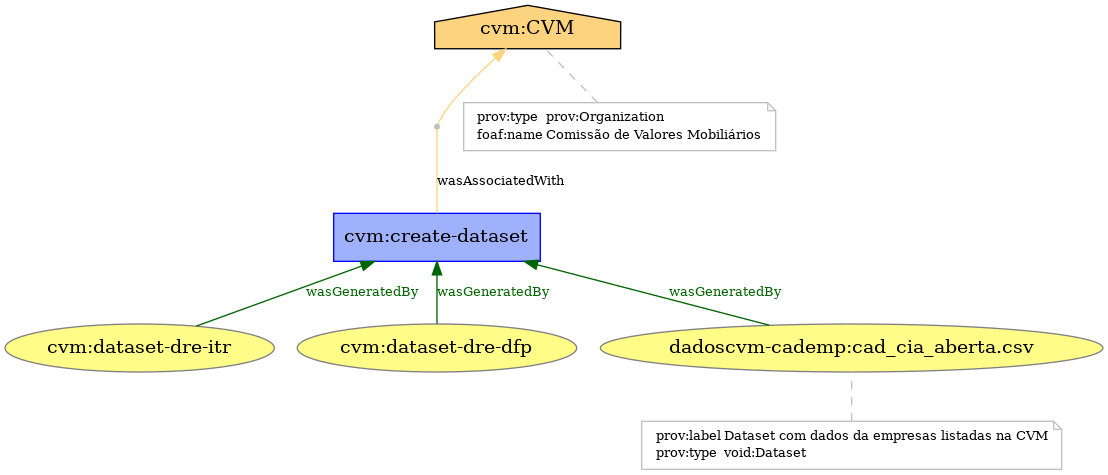

In [4]:
agent    = "Grupo02-Gil-Saulo-Valquire"                                         #PROV-Agent
entity   = "DREs-CVM"                                                           #PROV-Entity
activity = "TrabalhoFinalDisciplinaFundamentoDS-2022-2"                         #PROV-Activity
graph = entity                                                                  #PROV-Graph

def main():
    if(checkingEnvironmentVersions(True)):
        executeExperiment()
        createProvenance(agent, entity, activity, graph)
        
main()
Image(graph+".png")